In [1]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

PROVINSI DKI JAKARTA

 

JAKARTA BARAT
NIK 3171234567890123
Nama MIRA SETIAWAN
TempatTgi Lahir : JAKARTA, 18-02-1986
Jenis Kelamin : PEREMPUAN Gol. Darah : B Tn
Alamat JL. PASTI CEPAT A7/66 5
RTIRW 0071008 .
KeliDesa PEGADUNGAN
Kecamatan: KALIDERES .
Agama ISLAM
Status Perkawinan : KAWIN
Pekerjaan PEGAWAI SWASTA

JAKARTA BARAT

Kewarganegaraan : WNI
02-12-2012

Berlaku Hingga : 22-02-2017

 



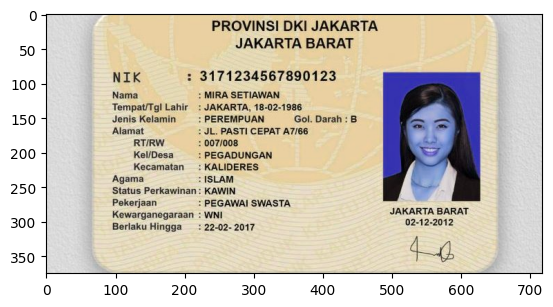

In [4]:
img = cv2.imread("ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', text.shape[0] + 1)


In [7]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")

print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    718   
1       2         1          1        0         0         0   241   11    239   
2       3         1          1        1         0         0   241   11    239   
3       4         1          1        1         1         0   241   11    239   
4       5         1          1        1         1         1   241   11     95   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
89      5         1          6        1         1         5   230  304     72   
90      2         1          7        0         0         0   556  325     33   
91      3         1          7        1         0         0   556  325     33   
92      4         1          7        1         1         0   556  325     33   
93      5         1          7        1         1         1   556  325     33   

    height  conf 

In [8]:
from pytesseract import Output

img = cv2.imread('ktp.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


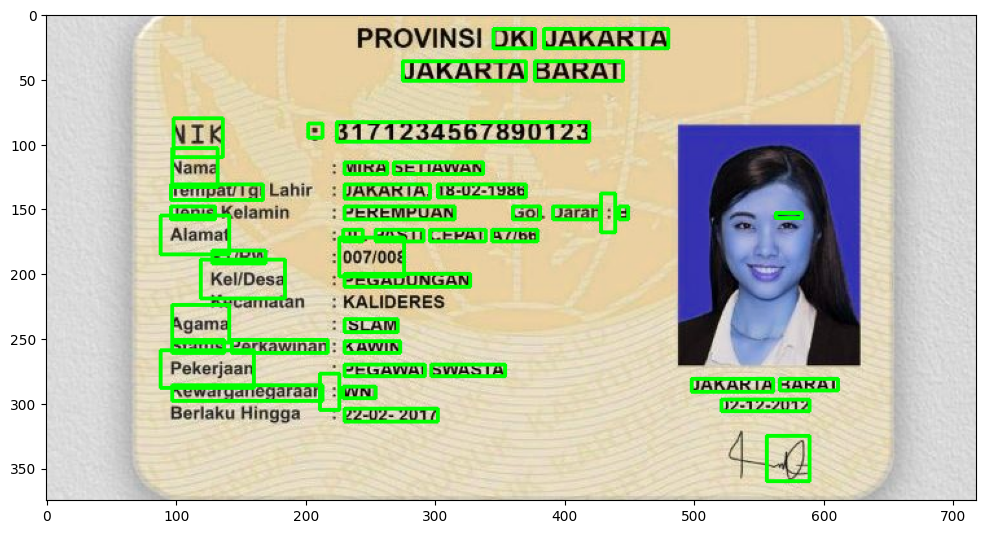

In [9]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [11]:
import pytesseract
from PIL import Image

def is_ktp(image_path):
    # Load the image from the uploaded file
    image = Image.open(image_path)

    # Perform OCR on the image
    text = pytesseract.image_to_string(image, lang='ind')

    # Define common keywords found in KTP
    ktp_keywords = ["REPUBLIK INDONESIA", "NIK", "Nama", "Tempat/Tgl Lahir", "Alamat", "RT/RW", "Kel/Desa", "Kecamatan", "Agama", "Status Perkawinan", "Pekerjaan", "Kewarganegaraan"]

    # Check if any of the keywords are found in the extracted text
    if any(keyword in text for keyword in ktp_keywords):
        return print("VALID")
    else:
        return print("INVALID")

# Path to the uploaded image
image_path = "ktp.png"

# Check if the image is a KTP
is_ktp_image = is_ktp(image_path)
is_ktp_image


VALID


In [20]:
import os
import pytesseract
from PIL import Image
import numpy as np
import cv2

def is_ktp(image_path):
    # Load the image from the uploaded file
    image = Image.open(image_path)
    
    # Convert image to numpy array and then to HSV
    image_np = np.array(image)
    image_hsv = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

    # Define range for blue color in HSV
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Create a mask for blue color
    mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
    blue_ratio = cv2.countNonZero(mask) / (image_hsv.shape[0] * image_hsv.shape[1])

    # Consider the image to have a blue color if more than 10% of the pixels are blue
    color_check = blue_ratio > 0.1

    # Perform OCR on the image
    text = pytesseract.image_to_string(image)

    # Define common keywords found in KTP
    ktp_keywords = ["REPUBLIK INDONESIA", "NIK", "Nama", "Tempat/Tgl Lahir", "Alamat", "RT/RW", "Kel/Desa", "Kecamatan", "Agama", "Status Perkawinan", "Pekerjaan", "Kewarganegaraan"]

    # Check if any of the keywords are found in the extracted text
    text_check = any(keyword.lower() in text.lower() for keyword in ktp_keywords)

    # The image is considered KTP if both text and color checks are passed
    return text_check and color_check

def process_dataset(folder_path):
    results = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            image_path = os.path.join(folder_path, filename)
            result = is_ktp(image_path)
            results[filename] = result
    return results

# Path to the folder containing images
folder_path = "data"  # Ganti path ini dengan path yang sesuai

# Process the dataset and print the results
results = process_dataset(folder_path)
for filename, is_ktp_image in results.items():
    print(f"{filename}: {'VALID' if is_ktp_image else 'TIDAK VALID'}")


ktp3.png: KTP
image.png: Not KTP
ktp2.png: KTP
ktp.png: Not KTP
